### Homework 2.2 - Heat Transfer

Use the finite differential method to solve a heat transfer equation, given by

$$ \frac{{\partial T}}{{\partial t}} = k\frac{{{\partial ^2}T}}{{\partial {x^2}}} $$

where $T(t, x)$ is the temperature distribution function.

Solve the equation for $x$ between 0 and 1. At $x=0$ the temperature varies as $T(t,0)=sin(10t)$ and at At $x=1$ the temperature varies as $T(t,0)=e^{ - 100 (t - 0.15)^2}$.

Make the animated clip of the temperature distribution function evolution. Pick appropriate time range.

$$\frac{{{T_{i,j + 1}} - {T_{i,j}}}}{\eta } = k\frac{{{T_{i + 1,j}} - 2{T_{i,j}} + {T_{i - 1,j}}}}{{{\delta ^2}}}$$

Let $\varepsilon  = \frac{{k\eta }}{{{\delta ^2}}}$

$${T_{i,j + 1}} - {T_{i,j}} = \varepsilon \left( {{T_{i + 1,j}} - 2{T_{i,j}} + {T_{i - 1,j}}} \right)$$

$${T_{i,j + 1}} = \varepsilon \left( {{T_{i + 1,j}} - 2{T_{i,j}} + {T_{i - 1,j}}} \right) + {T_{i,j}}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


In [63]:
nx = 10
nt = 1000
L=1
D=10
k=0.2
dh = (L-0) / nx
dt = D /nt


t=np.linspace(0,D,nt)
x=np.linspace(0,L,nx)

eps=k*dt/dh/dh
T = np.zeros((nx,nt))

T[0][1]= np.sin(10*1*dt)
T[-1][0] = np.exp(-100*(-0.15)**2)
T[-1][1] = np.exp(-100*(1*dt-0.15)**2)

for j in range(1,nt-1):
    T[0][j+1]= np.sin(10*(j+1)*dt)
    T[-1][j+1]= np.exp(-100*((j+1)*dt-0.15)**2)
    for i in range(1,nx-1):
        T[i][j+1]=eps*(T[i+1][j]-2*T[i][j]+T[i-1][j]) + T[i][j]
print(eps)

0.19999999999999998


<function matplotlib.pyplot.show(close=None, block=None)>

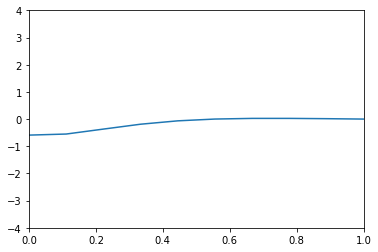

In [64]:
fig, ax = plt.subplots()
ax = plt.axes(xlim=(0, 1), ylim=(-4, 4))
line, = ax.plot(x,T[:,0])


def animate(i):
    line.set_data(x,T[:,i])
    return line

anim = animation.FuncAnimation(fig, animate, frames=1000, repeat=False)
anim.save('heat.mp4', fps = 100)
plt.show